In [1]:
import pandas as pd
import sys 
import os 
# Add the parent directory to the Python path 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.data_cleaning import get_xdr_data, clean_xdr_data

In [2]:
# Get data from PostgreSQL
data = get_xdr_data()

In [4]:
# Aggregate Information Per Customer
import numpy as np
# Handle missing values and outliers
data.fillna(data.mean(), inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Aggregating per customer
aggregated_data = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first'
}).reset_index()

# Compute average retransmission and RTT
aggregated_data['Average TCP Retransmission'] = (aggregated_data['TCP DL Retrans. Vol (Bytes)'] + aggregated_data['TCP UL Retrans. Vol (Bytes)']) / 2
aggregated_data['Average RTT'] = (aggregated_data['Avg RTT DL (ms)'] + aggregated_data['Avg RTT UL (ms)']) / 2
aggregated_data['Average Throughput'] = (aggregated_data['Avg Bearer TP DL (kbps)'] + aggregated_data['Avg Bearer TP UL (kbps)']) / 2

# Drop the intermediate columns
aggregated_data.drop(columns=['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'], inplace=True)

# Display the aggregated data
aggregated_data.head()


/tmp/ipykernel_19872/895860661.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)
/tmp/ipykernel_19872/895860661.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,MSISDN/Number,Handset Type,Average TCP Retransmission,Average RTT,Average Throughput
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,1.078479e+07,23.000000,38.0
1,3.360100e+10,Apple iPhone 7 (A1778),1.078479e+07,15.500000,49.5
2,3.360100e+10,undefined,1.078479e+07,63.729294,48.5
3,3.360101e+10,Apple iPhone 5S (A1457),3.803623e+05,42.000000,124.0
4,3.360101e+10,Apple iPhone Se (A1723),7.735101e+06,29.750000,14211.0


In [5]:
# List Top, bottom, and most frequent values for TCP retransmission
top_tcp_values = data['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
bottom_tcp_values = data['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
most_freq_tcp_values = data['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

# Display the values
print("Top TCP values:", top_tcp_values)
print("Bottom TCP values:", bottom_tcp_values)
print("Most Frequent TCP values:", most_freq_tcp_values)


Top TCP values: 77979     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119684    4.275259e+09
39637     4.268432e+09
76990     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom TCP values: 59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent TCP values: 2.080991e+07    88146
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: TCP DL Retrans. Vol (Bytes), dtype: int64


In [6]:
# List Top, bottom, and most frequent values for RTT
top_rtt_values = data['Avg RTT DL (ms)'].nlargest(10)
bottom_rtt_values = data['Avg RTT DL (ms)'].nsmallest(10)
most_freq_rtt_values = data['Avg RTT DL (ms)'].value_counts().head(10)

# Display the values
print("Top RTT values:", top_rtt_values)
print("Bottom RTT values:", bottom_rtt_values)
print("Most Frequent RTT values:", most_freq_rtt_values)


Top RTT values: 30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0
100584    24733.0
Name: Avg RTT DL (ms), dtype: float64
Bottom RTT values: 42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0
124544    0.0
142526    0.0
143878    0.0
71739     2.0
Name: Avg RTT DL (ms), dtype: float64
Most Frequent RTT values: 109.795706    27829
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
26.000000      2488
Name: Avg RTT DL (ms), dtype: int64


In [7]:
# List Top, bottom, and most frequent values for throughput
top_throughput_values = data['Avg Bearer TP DL (kbps)'].nlargest(10)
bottom_throughput_values = data['Avg Bearer TP DL (kbps)'].nsmallest(10)
most_freq_throughput_values = data['Avg Bearer TP DL (kbps)'].value_counts().head(10)

# Display the values
print("Top Throughput values:", top_throughput_values)
print("Bottom Throughput values:", bottom_throughput_values)
print("Most Frequent Throughput values:", most_freq_throughput_values)


Top Throughput values: 120890    378160.0
141262    299257.0
143670    299002.0
149617    276040.0
92193     269362.0
117791    266332.0
115850    265440.0
89577     264448.0
116565    263047.0
41576     254253.0
Name: Avg Bearer TP DL (kbps), dtype: float64
Bottom Throughput values: 13      0.0
149     0.0
364     0.0
546     0.0
618     0.0
679     0.0
756     0.0
809     0.0
893     0.0
1185    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64
Most Frequent Throughput values: 23.0    7324
43.0    4352
44.0    4186
6.0     3983
22.0    2867
48.0    2778
63.0    2757
42.0    2689
45.0    2644
47.0    2263
Name: Avg Bearer TP DL (kbps), dtype: int64


In [11]:
import plotly.express as px

# Distribution of average throughput per handset type
throughput_per_handset = aggregated_data.groupby('Handset Type')['Average Throughput'].mean().reset_index()

# Visualization with Plotly
fig = px.bar(throughput_per_handset, x='Handset Type', y='Average Throughput', title='Average Throughput per Handset Type')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Handset Type',
    yaxis_title='Average Throughput (kbps)',
    xaxis_tickangle=-45,
    autosize=False,
    width=1200,
    height=600,
)

fig.show()



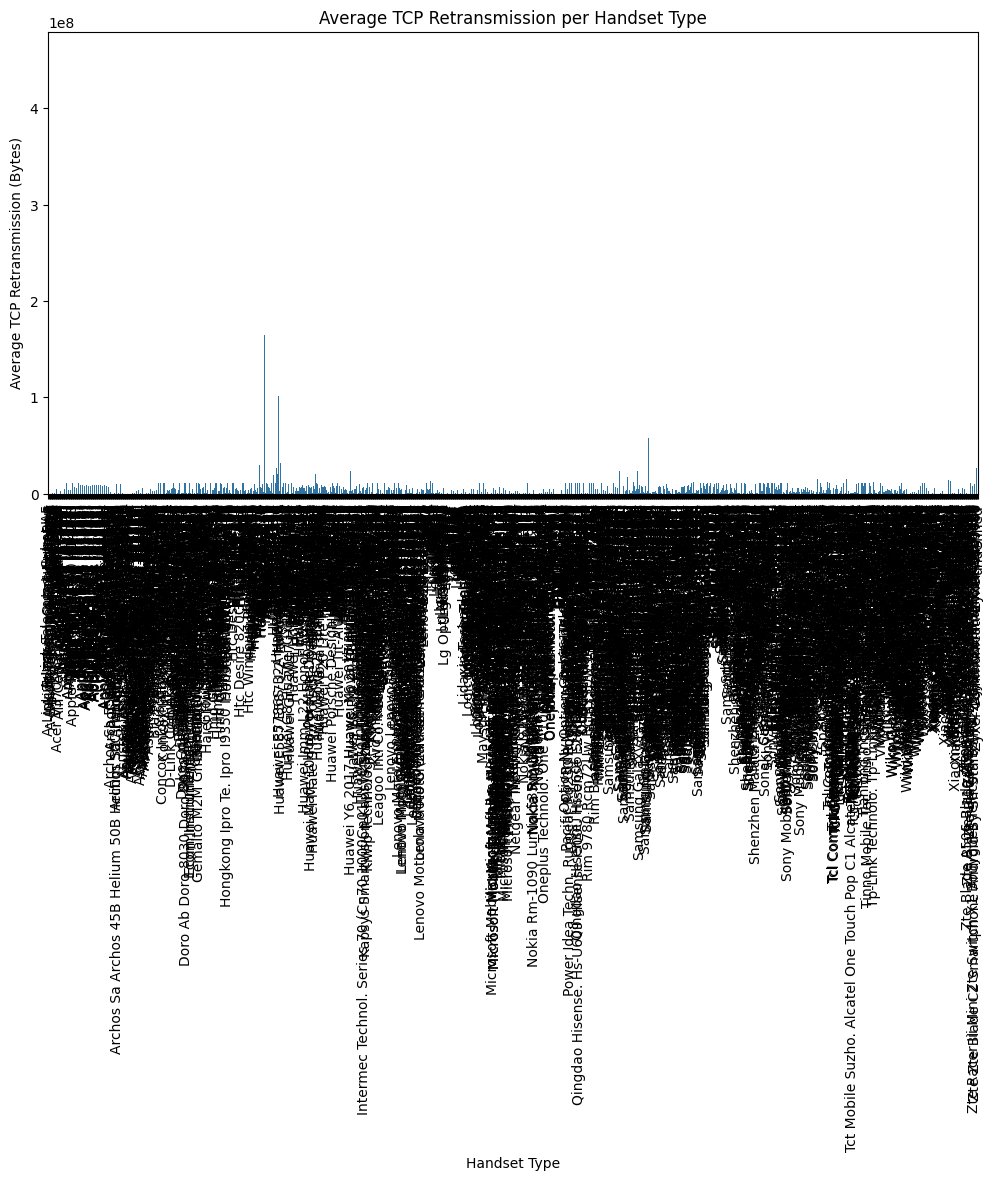

In [9]:
import plotly.express as px

# Average TCP retransmission per handset type
tcp_retransmission_per_handset = aggregated_data.groupby('Handset Type')['Average TCP Retransmission'].mean().reset_index()

# Visualization with Plotly
fig = px.bar(tcp_retransmission_per_handset, x='Handset Type', y='Average TCP Retransmission', title='Average TCP Retransmission per Handset Type')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Handset Type',
    yaxis_title='Average TCP Retransmission (Bytes)',
    xaxis_tickangle=-45,
    autosize=False,
    width=1200,
    height=600,
)

fig.show()



In [10]:
# Segment users into groups of experiences using k-means clustering (k=3)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = aggregated_data[['Average TCP Retransmission', 'Average RTT', 'Average Throughput']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Describe each cluster
cluster_description = aggregated_data.groupby('Cluster').mean()

print("Cluster Descriptions:")
print(cluster_description)


Cluster Descriptions:
         MSISDN/Number  Average TCP Retransmission  Average RTT  \
Cluster                                                           
0         4.751685e+10                8.432868e+06    70.712233   
1         3.367782e+10                1.012436e+07    51.329732   
2         3.368322e+10                1.096150e+09    71.933433   

         Average Throughput  
Cluster                      
0               2159.771994  
1              27529.750490  
2              35860.751647  
